In [1]:
import numpy as np
from sklearn.svm import SVC  # Support Vector classifier
import matplotlib.pyplot as plt

In [2]:
# 线性不可分SVM
# 绘制分隔超平面和其两侧的辅助超平面
def plot_svc_decision(model, ax=None, plot_support=True):
    # 2D SVC
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建网格用于评价模型
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 绘制超平面
    ax.contour(X, Y, P, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # 标识出支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='blue', facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [4]:
# 用make_blobs生成样本数据
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

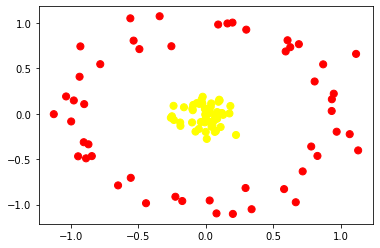

In [5]:
# 将样本数据绘制在直角坐标系中
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

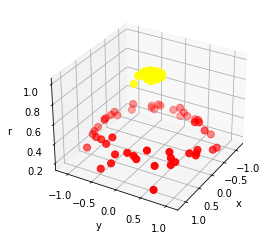

In [8]:
# 以上样本在二维空间中完全线性不可分
# 但是正负样本相对集中，如果将它们投射到三维空间中，则很可能是可分的
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=None, y=None):
    ax = plt.subplot(projection='3d')
    r = np.exp(-(X ** 2).sum(1))
    ax.scatter(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
plot_3D(X=X, y=y)
plt.show()

In [14]:
# 使用RBF核函数，并调高惩罚系数
model = SVC(kernel='rbf', C=100)
model.fit(X, y)

SVC(C=100)

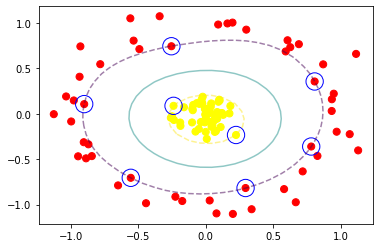

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(model)
plt.show()

- 对于sklearn.svm.SVC类，kernel参数的默认值就是rbf
- kernel参数支持：rbf, linear, sigmoid, precomputed, poly